In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive to google coalb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the path

file_path= "/content/drive/MyDrive/Book Recommendation System -Rohit Madame/Books.csv"
file_path1="/content/drive/MyDrive/Book Recommendation System -Rohit Madame/Ratings.csv"
file_path2="/content/drive/MyDrive/Book Recommendation System -Rohit Madame/Users.csv"

In [4]:
#Reading book data
book_df=pd.read_csv(file_path)

In [5]:
#Reading rating dataset
rating_df=pd.read_csv(file_path1)

In [6]:
#Reading user dataset
user_df=pd.read_csv(file_path2)

In [7]:
#Looking for the shape of dataset

print(f'The shape for book data is {book_df.shape}')
print(f'The shape for user data is {user_df.shape}')
print(f'The shape for ratings data is {rating_df.shape}')

The shape for book data is (271360, 8)
The shape for user data is (278858, 3)
The shape for ratings data is (1149780, 3)


In [8]:
#Looking for first five rows of book
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
# Renaming column name of 'books', 'users' & 'ratings' dataset
book_df.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)
user_df.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
rating_df.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

In [10]:
#Dropping Images column as we dont need it
book_df.drop(['Image-URL-S',	'Image-URL-M',	'Image-URL-L'],axis=1,inplace=True)

In [11]:
#Getting info about the book dataset
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271360 non-null  object
 1   title      271360 non-null  object
 2   author     271359 non-null  object
 3   year       271360 non-null  object
 4   publisher  271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [12]:
#Looking for unique values in year column of book data
book_df['year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
# book_df[book_df['year']==0]

In [13]:
#As we have seen there is  gallimard in the year column. This is wrong, so it is being investigated

pd.set_option('display.max_colWidth',None)

book_df[book_df['year']=='Gallimard']

,ISBN,title,author,year,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [14]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '2070426769'
book_df.loc[book_df.ISBN=='2070426769','year']=2003
book_df.loc[book_df.ISBN=='2070426769','author']='Jean-Marie Gustave Le ClÃ?Â©zio'
book_df.loc[book_df.ISBN=='2070426769','title']='Peuple du ciel, suivi de Les Bergers'
book_df.loc[book_df.ISBN=='2070426769','publisher']='Gallimard'

In [15]:
#As we have seen there is  DK Publishing in the year column. This is wrong, so it is being investigated

pd.set_option('display.max_colWidth',None)

book_df[book_df['year']=='DK Publishing Inc']

,ISBN,title,author,year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [16]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
book_df.loc[book_df.ISBN=='0789466953','year']=2000
book_df.loc[book_df.ISBN=='0789466953','author']='Michael Teitelbaum'
book_df.loc[book_df.ISBN=='0789466953','publisher']='DK Publishing Inc'
book_df.loc[book_df.ISBN=='0789466953','title']='DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'


In [17]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '078946697X'
book_df.loc[book_df.ISBN=='078946697X','year']=2000
book_df.loc[book_df.ISBN=='078946697X','author']='James Buckley'
book_df.loc[book_df.ISBN=='078946697X','publisher']='DK Publishing Inc'
book_df.loc[book_df.ISBN=='078946697X','title']='DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'


In [18]:
#Description about the book data
book_df.describe().T

,count,unique,top,freq
ISBN,271360,271360,0195153448,1
title,271360,242135,Selected Poems,27
author,271359,102021,Agatha Christie,632
year,271360,200,2002,13903
publisher,271358,16804,Harlequin,7535


In [20]:
#changing year is of object type so changing it to numeric
 
book_df['year']=pd.to_numeric(book_df['year'],errors='coerce')


In [21]:
#Checking for year column
book_df.year.dtypes

dtype('int64')

In [25]:
print(book_df.year.min() )
print(book_df.year.max())

0
2050


In [27]:
#Reaplacing values to NAN of minimum value in year and greater than 2022

book_df.loc[(book_df['year']>2022) | (book_df['year']==0),'year']=np.NAN

In [28]:
#So checking value of year

book_df['year'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 1911., 1904., 1949., 1932., 1928.,
       1929., 1927., 1931., 1914., 1934., 1910., 1933., 1902., 1924.,
       1921., 1900., 1944., 1917., 1901., 2010., 1908., 1906., 1935.,
       1806., 2021., 2012., 2006., 1909., 2008., 1378., 1919., 1922.,
       1897., 1376.])

In [29]:
#Checking description of year

book_df['year'].describe()

count    266729.000000
mean       1993.687915
std           8.321191
min        1376.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2021.000000
Name: year, dtype: float64

In [30]:
#Chekcing for null value's in book dataset

book_df.isnull().sum()

ISBN            0
title           0
author          1
year         4631
publisher       2
dtype: int64

In [31]:
#Filling nan values with median in the year column

book_df['year'].fillna(round(book_df['year'].median()),inplace=True)

In [32]:
#Dropping null values of book data set

book_df.dropna(axis=0,inplace=True)

In [33]:
#Checking for null values after dropping nan values

book_df.isnull().sum()

ISBN         0
title        0
author       0
year         0
publisher    0
dtype: int64

In [34]:
#Chekcing for info about book data
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ISBN       271357 non-null  object 
 1   title      271357 non-null  object 
 2   author     271357 non-null  object 
 3   year       271357 non-null  float64
 4   publisher  271357 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.4+ MB


In [35]:
#Checking for duplicate values

book_df.duplicated().sum()

0

User data

In [36]:
#Checking for user dataset

user_df.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [37]:
#Information about User dataset 

user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [38]:
#Chekcing for null values

user_df.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [39]:
#Getting unique value of user id

user_df['user_id'].unique()

array([     1,      2,      3, ..., 278856, 278857, 278858])

In [40]:
#Getting unique value of age

user_df['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [41]:
#Description about age data

user_df['age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: age, dtype: float64

In [42]:
#Replacing age less than five years and greater than 90  with nan values

user_df.loc[(user_df['age']<5) | (user_df['age']>90),'age']=np.NAN

In [43]:
#filling nan values with meadian
user_df['age'].fillna(user_df['age'].mean(),inplace=True)

In [44]:
#Descrription about age 
user_df['age'].describe()

count    278858.000000
mean         34.723840
std          10.506766
min           5.000000
25%          29.000000
50%          34.723840
75%          35.000000
max          90.000000
Name: age, dtype: float64

In [45]:
#Checking for duplicate values

user_df.duplicated().sum()

0

Ratings

In [46]:
#Getting first rows of rating dataset

rating_df.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [47]:
#Information about dataset
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [48]:
#Description about the rating dataset
rating_df.describe()

,user_id,rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [49]:
#Checking for null values 
rating_df.isnull().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

In [50]:
 #Creating dataframe which contains books that are only in books dataset
unique_ratings = rating_df[rating_df.ISBN.isin(book_df.ISBN)]

In [51]:
# Creating dataframe which contains user rating data that are aligning with the users dataset
ratings = rating_df[rating_df.user_id.isin(user_df.user_id)]

In [ ]:
# Uppercasing all alphabets in ISBN
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [ ]:
#Lets create a new dataframe which has similar userid and ISBN number mapped with each other
# final_dataset = pd.merge(books, ratings, on='ISBN', how='inner')
# final_dataset = pd.merge(final_dataset, users, on='user_id', how='inner')
# final_dataset.info()

In [ ]:
# Printing shapes of all the dataset.
print(rating_df.shape)
print(unique_ratings.shape)
print(book_df.shape)
print(user_df.shape)

(1149780, 3)
(1031133, 3)
(271357, 5)
(278858, 3)




EDA(Exploratory Data Analysis)



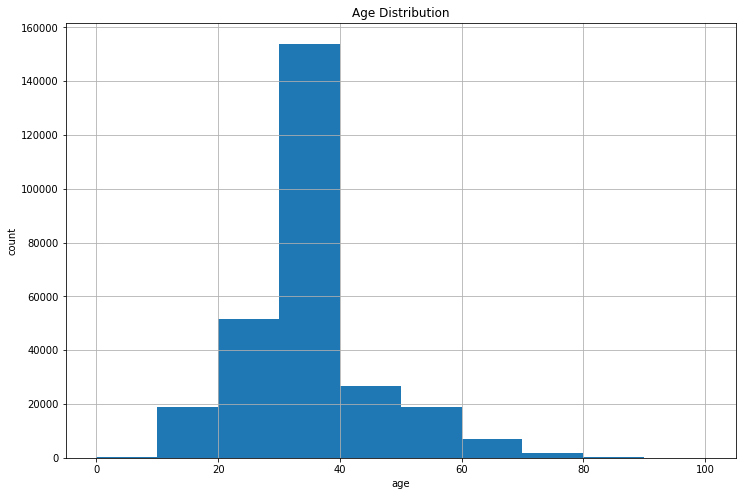

In [53]:
#Plot histogram to see the distribution of the data
fig = plt.figure(figsize = (12,8))
user_df.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

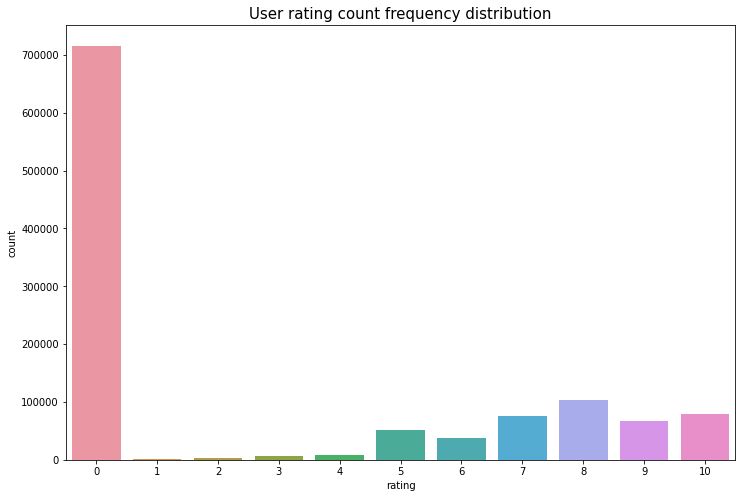

In [54]:
# Plotting count of rating to see how it's distributed
fig = plt.figure(figsize = (12,8))
sns.countplot(x='rating',data=rating_df)
plt.title("User rating count frequency distribution", fontsize =15)
plt.show()

In [55]:
'''
Since, the most frequent rating was 0 which might indicate that the user haven't rated the book. This may mislead the result.
Hence, we will separate the 0 rated data exclusively for better understanding of the most common user rating.

ratings_explicit = ratings excluding the 0 rating
'''

# Separating ratings
ratings_explicit= unique_ratings[unique_ratings['rating'] != 0]
ratings_implicit= unique_ratings[unique_ratings['rating'] == 0]

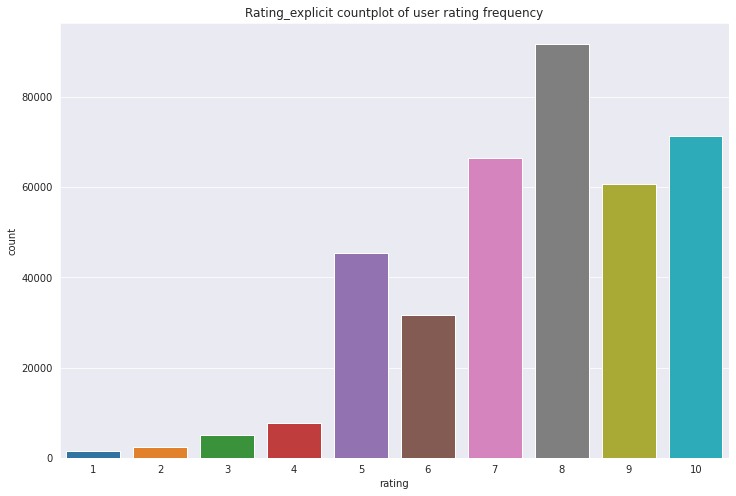

In [56]:
# Now plotting countplot of rating_explicit
fig = plt.figure(figsize = (12,8))
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='rating')
plt.title("Rating_explicit countplot of user rating frequency")
plt.show()

In [57]:
# Merging ratings_explicit with books dataset on ISBNs feature
new_book= pd.merge(book_df, ratings_explicit, on='ISBN')
new_book.head()

,ISBN,title,author,year,publisher,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9


In [58]:
# Grouping group data based on title and aggregate based on rating
top_ten_books= pd.DataFrame(new_book.groupby('title')['rating'].count().sort_values(ascending=False).head(10).reset_index())

In [59]:
# Printing top ten books 
print('The top ten books recommendations are :')
top_ten_books

The top ten books recommendations are :


,title,rating
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,494
3,The Secret Life of Bees,406
4,The Nanny Diaries: A Novel,393
5,The Red Tent (Bestselling Backlist),383
6,Bridget Jones's Diary,377
7,A Painted House,366
8,Life of Pi,336
9,Harry Potter and the Chamber of Secrets (Book 2),326


In [60]:
#our analysis ready dataset
new_book

,ISBN,title,author,year,publisher,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9
...,...,...,...,...,...,...,...
383834,0395264707,Dreamsnake,Vonda N. McIntyre,1978.0,Houghton Mifflin,275318,10
383835,1845170423,Cocktail Classics,David Biggs,2004.0,Connaught,275970,7
383836,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993.0,Ballantine Books,276313,5
383837,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),276463,7


In [61]:
#Users with more than 200 ratings 
numbers1 = ratings_explicit['user_id'].value_counts()
ratings = ratings_explicit[ratings_explicit['user_id'].isin(numbers1[numbers1 >= 200].index)]

#Books with more than 100 Ratings
number2 = ratings_explicit['rating'].value_counts()
ratings = ratings_explicit[ratings_explicit['rating'].isin(number2[number2 >= 100].index)]

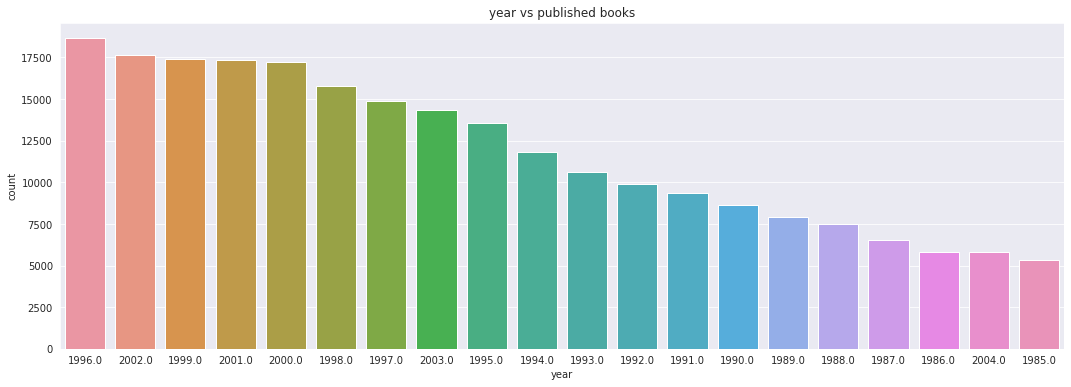

In [65]:

plt.figure(figsize=(18,6))
sns.countplot(x='year',data=book_df,order=pd.value_counts(book_df['year']).iloc[:20].index)
plt.title('year vs published books')
plt.show()

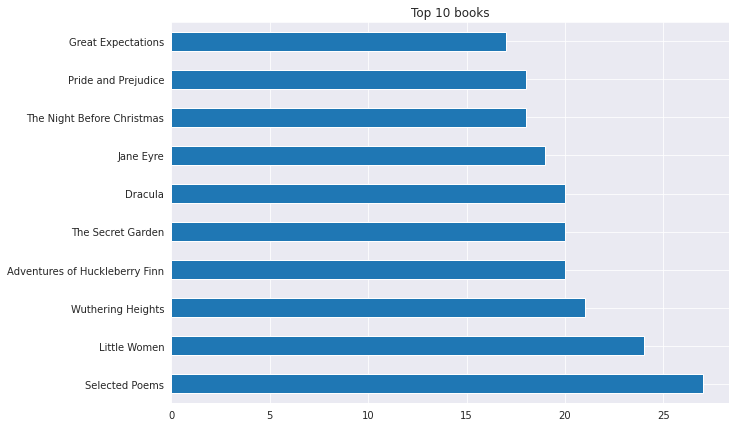

In [66]:
# Top 10 Products
ax = book_df['title'].value_counts()[:10].plot(kind = 'barh', legend = False, figsize = (10,7))
plt.title('Top 10 books') 
plt.show()

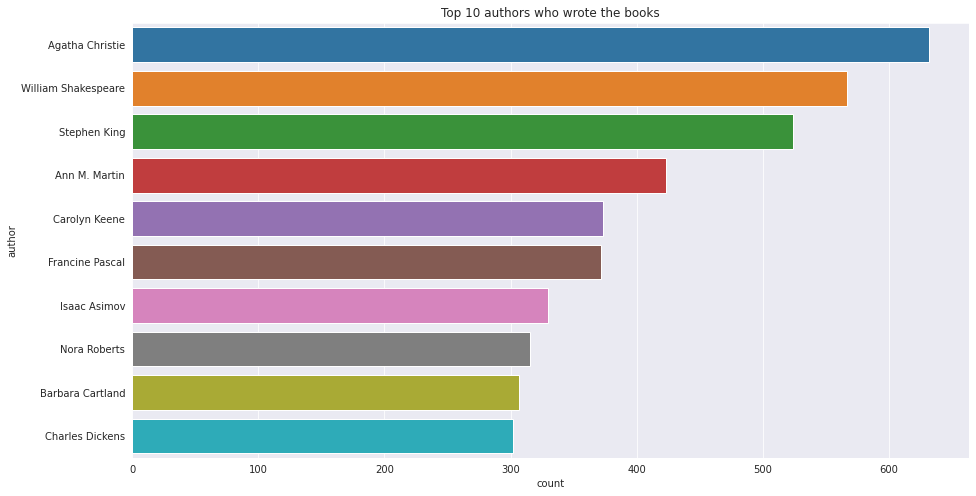

In [67]:
#Let's explore about authors
plt.figure(figsize=(15,8))
sns.countplot(y="author", data=book_df,order=book_df['author'].value_counts().index[0:10])
plt.title("Top 10 authors who wrote the books")
plt.show()

The dataset 'Ratings' and 'Books' have common column 'ISBN' so create new dataframe merging the two dataframes

In [62]:
#Merging the dataset ratings and Books
books_with_rating = pd.merge(rating_df, book_df, on='ISBN')

#books_with_rating.drop(books_with_rating.filter(regex='_y$').columns, axis=1, inplace=True)
books_with_rating.head()

,user_id,ISBN,rating,title,author,year,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books


In [63]:
#Merging the dataset ratings and Books
books_with_rating = pd.merge(rating_df, book_df, on='ISBN')

#books_with_rating.drop(books_with_rating.filter(regex='_y$').columns, axis=1, inplace=True)
books_with_rating.head()

,user_id,ISBN,rating,title,author,year,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books


In [68]:
books_with_rating.shape

(1031133, 7)

In [69]:
rating_count_df =books_with_rating.groupby('title')['rating'].count().reset_index() ## grouping 

In [70]:
#Print top 5 rows of dataset
rating_count_df.head()

,title,rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1


In [71]:
#Rename the column rating with total ratings
rating_count_df.rename(columns={'rating':'total_ratings'},inplace=True)

In [72]:
#Merging the dataframes
totalRatingCount_df = books_with_rating.merge(rating_count_df, left_on = 'title', right_on = 'title', how = 'left')
totalRatingCount_df.head()

,user_id,ISBN,rating,title,author,year,publisher,total_ratings
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60


In [73]:
#let's keep threshold popularity value 50 
popularity_threshold = 50
rating_popular_book = totalRatingCount_df.query('total_ratings >= @popularity_threshold')
rating_popular_book.head()

,user_id,ISBN,rating,title,author,year,publisher,total_ratings
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60


In [74]:
#making our final dataset which has explicit rating, and data books which has rated >100 times and users who rated >200 books.
combined = rating_popular_book.merge(user_df, left_on = 'user_id', right_on = 'user_id', how = 'left')## merging the dataframes

In [75]:
combined.head()

,user_id,ISBN,rating,title,author,year,publisher,total_ratings,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60,"tyler, texas, usa",34.72384
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60,"cincinnati, ohio, usa",23.00000
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60,"strafford, missouri, usa",34.00000
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60,"st. charles county, missouri, usa",34.72384
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,60,"beaverton, oregon, usa",34.72384


In [76]:
#Comibned dataframe's duplicate values should be drop  
combined.drop_duplicates(['user_id','title'],inplace=True)

In [ ]:
# # importing library
# from sklearn.neighbors import NearestNeighbors
# from scipy.sparse import csr_matrix

In [77]:
# Creating pivot table
pivot_matrix=combined.pivot(index='title',values='rating',columns='user_id')
# Returning top 5 rows
pivot_matrix.head()

user_id,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Filling Nan values to 0
pivot_matrix.fillna(0, inplace=True)

In [79]:
#Print top 5 rows of pivot matrix
pivot_matrix

user_id,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
from scipy.sparse import csr_matrix 

In [81]:
#csr is compressed sparse matrix since there are lots of NAn-->0
book_sparse = csr_matrix(pivot_matrix)

**KNN ( k-Nearest Neighbors)**

In [82]:
from sklearn.neighbors import NearestNeighbors

In [83]:
# metric used for evaluation is cosine and algorithm is brute
model = NearestNeighbors(metric = 'cosine',algorithm='brute')

In [84]:
#Let's fit the model 
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [85]:
#Generating random book indices out of the book_matrix
random_book = np.random.choice(pivot_matrix.shape[0])
print(random_book)
print(pivot_matrix.iloc[random_book,:].values.reshape(1,-1))
#Apply the k neighbors to fiited model this will create clusters
distances, indices = model.kneighbors(pivot_matrix.iloc[random_book,:].values.reshape(1, -1), n_neighbors = 6)
pivot_matrix.index[random_book]

1676
[[0. 0. 0. ... 0. 0. 0.]]


'The Amazing Adventures of Kavalier &amp; Clay'

In [86]:
#Printing the random book name and suggested books.
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot_matrix.index[random_book]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i, pivot_matrix.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Amazing Adventures of Kavalier &amp; Clay:

1: Prague : A Novel, with distance of 0.9028114485337484
2: Breakfast of Champions, with distance of 0.9035671277492583
3: Waiting (Vintage International), with distance of 0.9167544573788982
4: Bel Canto, with distance of 0.917492002633621
5: Second Nature, with distance of 0.9201401943988903


In [87]:
#Function to get recommendation for known books from our dataset.
def recommend_books(book_name):
   book_id = np.where(pivot_matrix.index==book_name)[0][0]
   print(book_id)
   distances ,suggestions = model.kneighbors(pivot_matrix.iloc[book_id,:].values.reshape(1,-1),n_neighbors = 6)
   
   for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot_matrix.index[book_id]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivot_matrix.index[suggestions.flatten()[i]], distances.flatten()[i]))

In [88]:
#Let's try to get recommandation for book 'The Hobbit'
recommend_books('Roses Are Red')

1431
Recommendations for Roses Are Red:

1: Pop Goes the Weasel, with distance of 0.8338442818714958:
2: Mixed Blessings, with distance of 0.8423098773907557:
3: 2nd Chance, with distance of 0.8455869211793992:
4: Violets Are Blue, with distance of 0.8531466501755216:
5: Dust to Dust, with distance of 0.8582457557668258:


SVD(singular Value Decomposition)

In [91]:
 !pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633983 sha256=ad1a19471357048c9a3181237e215043351d92240b36762da6f8711643409ec8
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [92]:
# # Importing Reader & Dataset from surprise
# from surprise import Reader, Dataset
# Creating a 'Reader' object to set the limit of the ratings 
from surprise import Reader,Dataset
reader = Reader(rating_scale=(1, 10))
# Loading our ratings_explicit data
data = Dataset.load_from_df(ratings_explicit, reader)

In [93]:

data = Dataset.load_from_df(ratings_explicit, reader)

In [94]:
from surprise import SVD,model_selection,accuracy
# Using the famous SVD algorithm
model = SVD()

# Train on explicit_rating dataset
# Runing 5-fold cross-validation and print results
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6380  1.6261  1.6449  1.6289  1.6467  1.6369  0.0083  
Fit time          34.72   25.37   26.28   24.44   26.51   27.46   3.70    
Test time         1.01    1.06    0.70    1.12    0.87    0.95    0.15    
CPU times: user 2min 26s, sys: 637 ms, total: 2min 27s
Wall time: 2min 34s


{'test_rmse': array([1.63802895, 1.62607929, 1.6449157 , 1.62894794, 1.64670585]),
 'fit_time': (34.724228858947754,
  25.374587059020996,
  26.276155710220337,
  24.44111132621765,
  26.505489349365234),
 'test_time': (1.012345790863037,
  1.061429500579834,
  0.7042202949523926,
  1.115379810333252,
  0.8748912811279297)}

In [95]:
# train test split on our data
trainset, testset = model_selection.train_test_split(data, test_size=0.2)
# creating svd model
model = SVD()
# Fit the model
model.fit(trainset)
# Predict the model on test data
predictions = model.test(testset)
# Evaluating model
accuracy.rmse(predictions)


RMSE: 1.6502


1.6502139711030557

In [96]:
# Taking an arbitrary user-id and item-id to test our model.
uid = 276744  
iid = '038550120X'
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.24   {'was_impossible': False}


In [97]:
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rating= ratings_explicit[(ratings_explicit.user_id==pred.uid) & 
                             (ratings_explicit.ISBN==pred.iid)].rating.values[0]
print(f'The real rating given for this was {actual_rating:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.24.

The real rating given for this was 7.00.


In [98]:
# The following function was adapted from the surprise docs
# and can be used to get the top book recommendations for each user.
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [99]:
# Predicting modelon testset
pred = model.test(testset)
# top-N recommendation for each user from a set of predictions
top_n = get_top_n(pred)

In [100]:
#Function to get recommandation by giving user-id as input.
def get_reading_list(userid):
    """
    Retrieve full book titles from full 'books_users_ratings' dataframe
    """
    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title_ = new_book.loc[new_book.ISBN==book].title.unique()[0]
        reading_list[title_] = rating
    return reading_list

In [101]:
# Just picking a random user_id=116866
example_reading_list = get_reading_list(userid = 116866)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

The Flanders Panel: 8.431893570978774
Prairyerth: (A Deep Map (A Deep Map): 8.372437182229243
SHIPPING NEWS: 8.140966296121483
The Man Who Tasted Shapes: A Bizarre Medical Mystery Offers Revolutionary Insights into Emotions, Reasoning, and Consciousness: 7.8998606603802966
Lucy: The Beginnings of Humankind: 7.8997300503232575
Full Spectrum 3: 7.8997300503232575
Discrete Multivariate Analysis: Theory and Practice: 7.8997300503232575
Statistics for Experimenters: An Introduction to Design, Data Analysis, and Model Building: 7.8997300503232575
Granta 52: Food : The Vital Stuff: 7.8997300503232575
River Why: 7.8997300503232575


Conclusion
Recommendation system is unturned to exist in the e-commerce businesses with the help of collaborative or content-based filtering to predict different items and yes, users are most satisfied with the products recommended to them.

As we have seen the age group between 30 to 40 reads the most books.

We have removed the readers who did not give rating and then we found that most of the users gave 8 stars.

KNN model gives good recommendation for books.